In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
d = files.upload()

Saving Customer+List.csv to Customer+List.csv


In [3]:
df = pd.read_csv('Customer+List.csv')

In [4]:
df.shape

(400, 5)

In [5]:
df.head()

,Customer ID,Gender,Age,Salary,Purchased
0,1,Male,19,19000,0
1,2,Male,35,20000,0
2,3,Female,26,43000,0
3,4,Female,27,57000,0
4,5,Male,19,76000,0


In [6]:
df.tail()

,Customer ID,Gender,Age,Salary,Purchased
395,396,Female,46,41000,1
396,397,Male,51,23000,1
397,398,Female,50,20000,1
398,399,Male,36,33000,0
399,400,Female,49,36000,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  400 non-null    int64 
 1   Gender       400 non-null    object
 2   Age          400 non-null    int64 
 3   Salary       400 non-null    int64 
 4   Purchased    400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [9]:
df['Gender'] = le.fit_transform(df['Gender'])

In [12]:
df=df.drop('Customer ID', axis = 1)

In [13]:
df.isnull().sum()

,0
Gender,0
Age,0
Salary,0
Purchased,0


In [14]:
df

,Gender,Age,Salary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [21]:
x = df.iloc[:,:-1]
y = df.iloc[:,3:4]

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=3)

In [24]:
x

,Gender,Age,Salary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [25]:
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [26]:
x_train.shape

(280, 3)

In [27]:
y_train.shape

(280, 1)

In [28]:
x_test.shape

(120, 3)

In [29]:
y_test.shape

(120, 1)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
lr = LogisticRegression()

In [32]:
lr.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
y_predictlr = lr.predict(x_test)

In [34]:
y_predictlr

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1])

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
cm = confusion_matrix(y_test,y_predictlr)

In [37]:
cm

array([[72,  6],
       [15, 27]])

In [38]:
vp = lr.predict_proba(x_test)

In [40]:
vp[0,:]

array([0.24165292, 0.75834708])

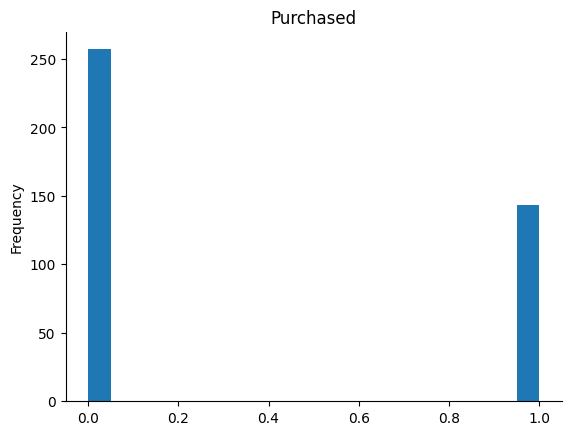

In [16]:
# @title Purchased

from matplotlib import pyplot as plt
df['Purchased'].plot(kind='hist', bins=20, title='Purchased')
plt.gca().spines[['top', 'right',]].set_visible(False)